<a href="https://colab.research.google.com/github/sebastianmunozvasq/Portfolio-SMV/blob/main/Plotting_2_D_Velocity_Profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting 2-D Velocity Profiles



#### Objective


We aim to plot the velocity profile:

$$ v_x = -2y $$
$$ v_y = 2x $$

Over the domain $x = [-5,5]$, $y = [-5,5]$. We will consider $x$ as the horizontal coordinate and $y$ as the vertical coordinate.


#### Step 1: Import Modules


In [ ]:
# Data visualization and plotting

import matplotlib.pyplot as plt

# Numerical computation
import numpy as np


#### Step 2: Prepare Variables for Contour Plot


In [ ]:
# First, we will define the domain vectors
# using the linspace function
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

# With these vectors, we can generate a grid using NumPy's meshgrid function
# Meshgrid generates matrices X and Y to create a "grid" based on the domain vectors
X, Y = np.meshgrid(x, y)
print(x, Y)


[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ] [[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.79591837 -4.79591837 -4.79591837 ... -4.79591837 -4.79591837
  -4.79591837]
 [-4.59183673 -4.59183673 -4.59183673 ... -4.59183673 -4.59183673
  -4.59183673]
 ...
 [ 4.59183673  4.59183673  4.59183673 ...  4.59183673  4.59183673
   4.59183673]
 [ 4.79591837  4.79591837  4.79591837 ...  4.79591837  4.79591837
   

Plot the grid to visualize the generated meshgrid

<ipython-input-11-c9afe0e8b775>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')


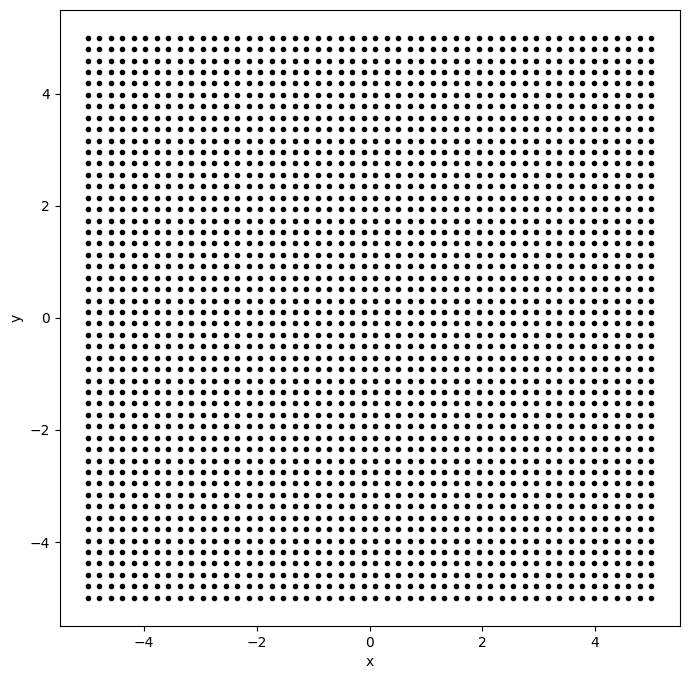

In [ ]:
# Create the figure
plt.figure(figsize=[8,8])

# Plot points with 2D input / 2D output
plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')

# Axis titles
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


#### Step 3: Definition of the velocity profile

The norm of a vector can be calculated using:

$$ |\mathbf{v}| = \sqrt{v_x^2 + v_y^2} $$

In [ ]:
# Definition of each velocity component
v_x = -2 * Y
v_y = 2 * X

# Calculation of the vector magnitude [v_x, v_y]
V = np.sqrt(v_x**2 + v_y**2)


#### Step 4: Visualization

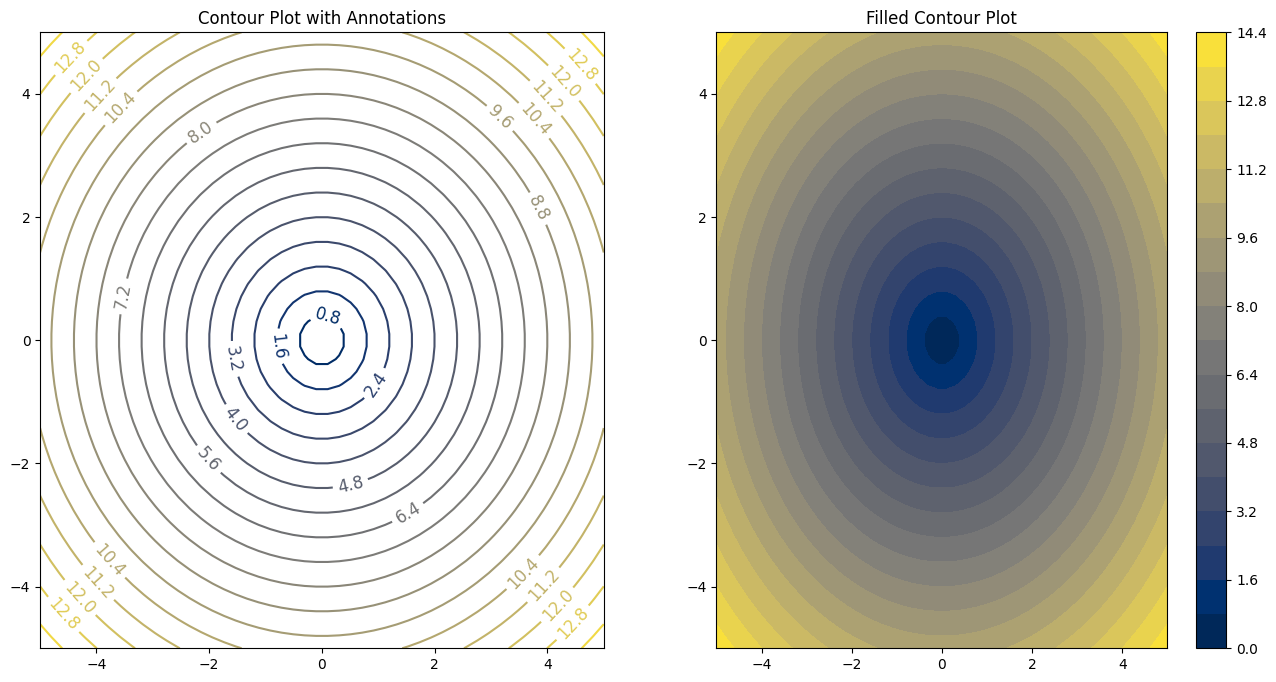

In [ ]:

# Select a color map inclusive for people with color vision limitations
cm = "cividis"

# Generate an "axis" object for plotting, and two subplots
fig, ax = plt.subplots(1, 2, figsize=[16, 8])

# Contour plot without filling
cp = ax[0].contour(X, Y, V, 20, cmap=cm)

# Annotate the value of the velocity magnitude
# on each contour line
ax[0].clabel(cp, inline=True, fontsize=12)

# Contour plot with filling
cpf = ax[1].contourf(X, Y, V, 20, cmap=cm)

# Add color bar
fig.colorbar(cpf)

# Titles for the plots
ax[0].set_title('Contour Plot with Annotations')
ax[1].set_title('Filled Contour Plot')

# Save the file
plt.savefig('contours.pdf')


This graph is easy to interpret, however it provides only the information of a scalar at a given point in the domain.

#### Step 5: Prepare variables for the "quiver" or "tangent" chart

In [ ]:
# Define the velocity profiles
# In this case, we will only generate 15 points on each axis
# to improve the visualization of the arrows

x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
X, Y = np.meshgrid(x, y)

b = 2
v_x = -b * Y
v_y = b * X

cm = 'cividis'
# Everything up to here is the same as before


#### Step 6: Plotting

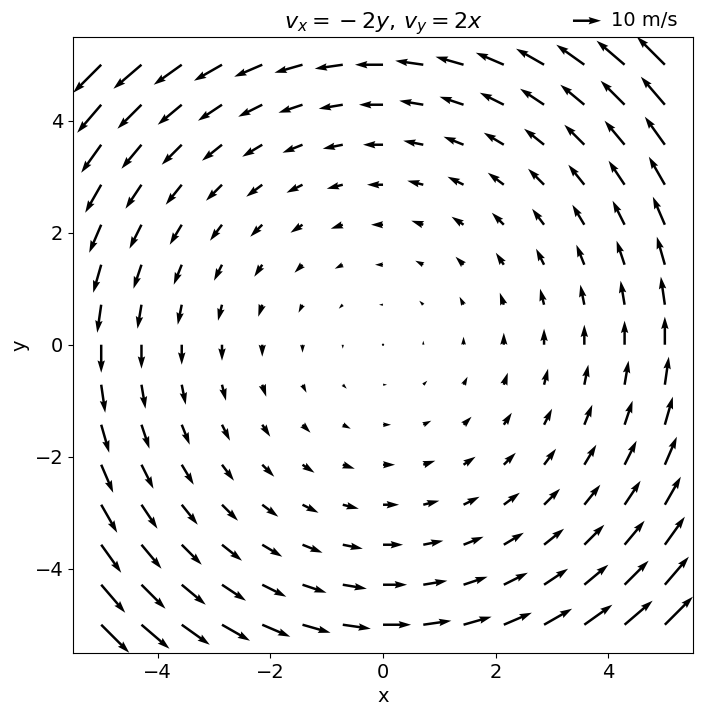

In [ ]:
# Generate axes
fig, ax = plt.subplots(figsize=[8, 8])

# Quiver generates a "quiver plot" to better visualize the velocity profiles
q = ax.quiver(X, Y, v_x, v_y, color='k')

# Add title to the plot
ax.set_title(r'$v_x = -$' + str(b) + r'$y$' + r', $v_y = $' + str(b) + r'$x$', size=16)

# (Optional): Add an additional reference arrow to associate
# the size of an arrow with the numerical value of the velocity magnitude.
ax.quiverkey(q, 0.785, 0.9, U=10, label='10 m/s', coordinates='figure', labelpos='E', fontproperties={"size": 14})

# Aesthetic aspects: axis titles and font size for axis numbers
ax.tick_params(labelsize=14)
ax.set_xlabel("x", size=14)
ax.set_ylabel("y", size=14)

# Export the file as .pdf to use in other applications
plt.savefig('tangentes.pdf')
